In [2]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
csv_path = "data.csv"
df = pd.read_csv(csv_path)



In [4]:
df.head(3)

,path,label,h_mean,h_std,s_mean,s_std,v_mean,v_std,l_mean,l_std,...,lbp_15,lbp_16,lbp_17,hog_mean,hog_std,edge_density,area,perimeter,circularity,aspect_ratio
0,dataset/train_banana_aug\Diseased leaf\Banana ...,Diseased leaf,32.662787,5.421608,174.621018,31.536488,141.637047,49.563890,139.696907,48.546653,...,0.0,0.0,0.113100,0.179853,0.274160,0.0,5976.5,507.036577,0.292131,0.647482
1,dataset/train_banana_aug\Diseased leaf\Banana ...,Diseased leaf,45.561595,5.288004,224.260542,30.552424,124.343622,21.467653,118.975693,20.844470,...,0.0,0.0,0.286505,0.170371,0.082051,0.0,64256.0,1122.852812,0.640439,1.000000
2,dataset/train_banana_aug\Diseased leaf\Banana ...,Diseased leaf,44.520979,6.153641,168.185548,28.622999,107.479098,23.373493,105.346392,23.379173,...,0.0,0.0,0.327304,0.063115,0.110336,0.0,65025.0,1020.000000,0.785398,1.000000


In [5]:
df.tail(3)


,path,label,h_mean,h_std,s_mean,s_std,v_mean,v_std,l_mean,l_std,...,lbp_15,lbp_16,lbp_17,hog_mean,hog_std,edge_density,area,perimeter,circularity,aspect_ratio
2858,dataset/train_banana_aug\None-leaf\None_leaf 9...,None-leaf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2859,dataset/train_banana_aug\None-leaf\None_leaf 9...,None-leaf,26.496477,2.764797,64.541649,31.738148,135.776627,30.537814,138.985495,32.024639,...,0.0,0.0,0.043220,0.136163,0.234977,0.0,1157.5,172.409161,0.489339,1.117647
2860,dataset/train_banana_aug\None-leaf\None_leaf 9...,None-leaf,74.544480,45.176289,103.986466,74.585599,112.416890,85.690258,105.149584,87.639406,...,0.0,0.0,0.149513,0.191318,0.491893,0.0,1676.5,377.002087,0.148227,0.692308


In [6]:
df = df.drop(columns=['path'])
df['label'] = df['label'].replace('Diseased leaf', 'Unhealthy leaf')

In [7]:
df_col = df.columns.tolist()
print(df_col)

['label', 'h_mean', 'h_std', 's_mean', 's_std', 'v_mean', 'v_std', 'l_mean', 'l_std', 'a_mean', 'a_std', 'b_mean', 'b_std', 'gray_mean', 'gray_std', 'h_hist_0', 'h_hist_1', 'h_hist_2', 'h_hist_3', 'h_hist_4', 'h_hist_5', 'h_hist_6', 'h_hist_7', 'h_hist_8', 'h_hist_9', 'h_hist_10', 'h_hist_11', 'h_hist_12', 'h_hist_13', 'h_hist_14', 'h_hist_15', 'glcm_contrast', 'glcm_homogeneity', 'glcm_energy', 'glcm_correlation', 'lbp_0', 'lbp_1', 'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7', 'lbp_8', 'lbp_9', 'lbp_10', 'lbp_11', 'lbp_12', 'lbp_13', 'lbp_14', 'lbp_15', 'lbp_16', 'lbp_17', 'hog_mean', 'hog_std', 'edge_density', 'area', 'perimeter', 'circularity', 'aspect_ratio']


In [8]:
df.head(3)

,label,h_mean,h_std,s_mean,s_std,v_mean,v_std,l_mean,l_std,a_mean,...,lbp_15,lbp_16,lbp_17,hog_mean,hog_std,edge_density,area,perimeter,circularity,aspect_ratio
0,Unhealthy leaf,32.662787,5.421608,174.621018,31.536488,141.637047,49.563890,139.696907,48.546653,111.591287,...,0.0,0.0,0.113100,0.179853,0.274160,0.0,5976.5,507.036577,0.292131,0.647482
1,Unhealthy leaf,45.561595,5.288004,224.260542,30.552424,124.343622,21.467653,118.975693,20.844470,92.627281,...,0.0,0.0,0.286505,0.170371,0.082051,0.0,64256.0,1122.852812,0.640439,1.000000
2,Unhealthy leaf,44.520979,6.153641,168.185548,28.622999,107.479098,23.373493,105.346392,23.379173,103.788108,...,0.0,0.0,0.327304,0.063115,0.110336,0.0,65025.0,1020.000000,0.785398,1.000000


In [9]:
df.isnull().sum()

label               0
h_mean              0
h_std               0
s_mean              0
s_std               0
v_mean              0
v_std               0
l_mean              0
l_std               0
a_mean              0
a_std               0
b_mean              0
b_std               0
gray_mean           0
gray_std            0
h_hist_0            0
h_hist_1            0
h_hist_2            0
h_hist_3            0
h_hist_4            0
h_hist_5            0
h_hist_6            0
h_hist_7            0
h_hist_8            0
h_hist_9            0
h_hist_10           0
h_hist_11           0
h_hist_12           0
h_hist_13           0
h_hist_14           0
h_hist_15           0
glcm_contrast       0
glcm_homogeneity    0
glcm_energy         0
glcm_correlation    0
lbp_0               0
lbp_1               0
lbp_2               0
lbp_3               0
lbp_4               0
lbp_5               0
lbp_6               0
lbp_7               0
lbp_8               0
lbp_9               0
lbp_10    

In [10]:
df.describe()

,h_mean,h_std,s_mean,s_std,v_mean,v_std,l_mean,l_std,a_mean,a_std,...,lbp_15,lbp_16,lbp_17,hog_mean,hog_std,edge_density,area,perimeter,circularity,aspect_ratio
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,...,2861.0,2861.0,2861.000000,2861.000000,2861.000000,2861.0,2861.000000,2861.000000,2861.000000,2861.000000
mean,35.421520,7.920814,113.671477,28.742220,103.932452,26.309433,101.594821,25.850922,85.542602,5.134068,...,0.0,0.0,0.160235,0.114751,0.159951,0.0,25710.932017,700.469093,0.383425,0.870721
std,21.845909,10.196010,75.769876,21.365299,62.971563,19.929432,61.107910,19.357976,45.757049,4.424460,...,0.0,0.0,0.127969,0.078682,0.154909,0.0,25575.185851,598.852143,0.302357,0.715568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,27.320856,1.564668,59.566549,11.222940,69.451173,11.808423,69.176136,11.773653,91.250063,1.580319,...,0.0,0.0,0.010247,0.033540,0.020356,0.0,188.000000,67.698484,0.098334,0.448276
50%,39.028569,4.638279,121.055804,28.492605,122.769416,25.164887,120.191345,24.773485,104.673927,4.534343,...,0.0,0.0,0.188683,0.133250,0.109797,0.0,14252.000000,840.707711,0.337047,1.000000
75%,48.132727,10.035075,172.195251,44.313275,146.752487,40.218628,143.967328,39.495022,115.360390,7.509835,...,0.0,0.0,0.286530,0.180273,0.277430,0.0,49729.000000,1020.000000,0.735717,1.000000
max,100.592493,56.788230,252.652298,84.892103,254.802244,97.070541,248.768595,96.128612,129.676091,21.863438,...,0.0,0.0,0.333283,0.280626,1.000000,0.0,65025.000000,3848.575132,0.853142,7.466666


In [11]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
# Separate classes
df_healthy = df[df['label'] == 'Healthy Leaf']
df_none = df[df['label'] == 'None-leaf']
df_unhealthy = df[df['label'] == 'Unhealthy leaf']

# Downsample majority class
df_none_down = resample(df_none, 
                        replace=False, 
                        n_samples=len(df_healthy), 
                        random_state=42)

# Combine back
df_balanced = pd.concat([df_healthy, df_unhealthy, df_none_down])

# Now X and y
X_bal = df_balanced.drop('label', axis=1).values
y_bal = le_encoder.fit_transform(df_balanced['label'])




In [12]:
print("Class mapping:")

# Map numeric labels back to class names
for i, class_name in enumerate(le_encoder.classes_):
    print(f"{i} --> {class_name}")

Class mapping:
0 --> Healthy Leaf
1 --> None-leaf
2 --> Unhealthy leaf


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)
print(f"📊 Train: {len(X_train)}, Test: {len(X_test)}")



📊 Train: 1795, Test: 449


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
param_grid = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

Knn_model = KNeighborsClassifier()
grid = GridSearchCV(Knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print(f"Best Params: {grid.best_params_}")

Best Params: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

# Predict
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')  # or 'macro' depending on your dataset
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy:  {acc:.4f}")
print(f"🎯 Precision: {prec:.4f}")
print(f"🔥 F1 Score:  {f1:.4f}")

print("\n📋 Classification Report:\n")
# ensure class names exist (use the fitted LabelEncoder)
class_names = list(le_encoder.classes_)
print(classification_report(y_test, y_pred, target_names=class_names))


✅ Accuracy:  0.9042
🎯 Precision: 0.9049
🔥 F1 Score:  0.9042

📋 Classification Report:

                precision    recall  f1-score   support

  Healthy Leaf       0.91      0.94      0.92       149
     None-leaf       0.93      0.87      0.90       150
Unhealthy leaf       0.88      0.90      0.89       150

      accuracy                           0.90       449
     macro avg       0.90      0.90      0.90       449
  weighted avg       0.90      0.90      0.90       449



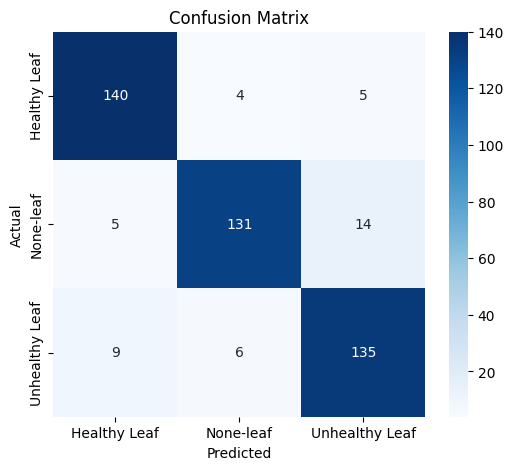

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

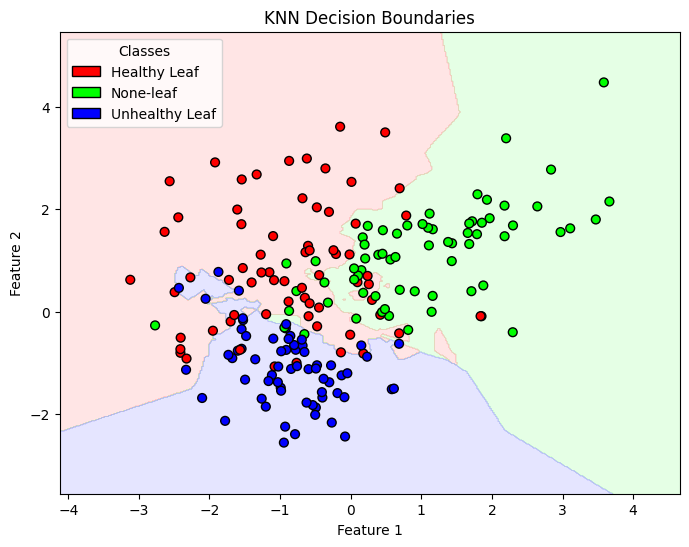

In [ ]:
# === Import libraries ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# === Generate a 2D dataset === x``
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    n_classes=3,  # Try 2 or 3 classes to see difference
    random_state=42
)

# === Fit KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# === Create a mesh grid for plotting ===
h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# === Predict for each point in the grid ===
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# === Plot decision boundaries ===
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# === Plot decision boundaries with legend ===
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

plt.title("KNN Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# === Add legend with actual class names ===
from matplotlib.patches import Patch
class_names = ['Healthy Leaf', 'None-leaf', 'Unhealthy Leaf']
colors = ['#FF0000', '#00FF00', '#0000FF']

legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=class_names[i]) 
                   for i in range(len(class_names))]

plt.legend(handles=legend_elements, title="Classes")
plt.show()
